# Data Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import wfdb
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [5]:
dataset =pd.read_csv("mitbih_train.csv")
dataset.head()

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#Information of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87553 entries, 0 to 87552
Columns: 188 entries, 9.779411554336547852e-01 to 0.000000000000000000e+00.88
dtypes: float64(188)
memory usage: 125.6 MB


In [7]:
print(dataset.columns)

Index(['9.779411554336547852e-01', '9.264705777168273926e-01',
       '6.813725233078002930e-01', '2.450980395078659058e-01',
       '1.544117629528045654e-01', '1.911764740943908691e-01',
       '1.519607901573181152e-01', '8.578431606292724609e-02',
       '5.882352963089942932e-02', '4.901960864663124084e-02',
       ...
       '0.000000000000000000e+00.79', '0.000000000000000000e+00.80',
       '0.000000000000000000e+00.81', '0.000000000000000000e+00.82',
       '0.000000000000000000e+00.83', '0.000000000000000000e+00.84',
       '0.000000000000000000e+00.85', '0.000000000000000000e+00.86',
       '0.000000000000000000e+00.87', '0.000000000000000000e+00.88'],
      dtype='object', length=188)


In [10]:
print(dataset.describe())

       9.779411554336547852e-01  9.264705777168273926e-01  \
count              87553.000000              87553.000000   
mean                   0.890359                  0.758158   
std                    0.240910                  0.221814   
min                    0.000000                  0.000000   
25%                    0.921922                  0.682482   
50%                    0.991342                  0.826007   
75%                    1.000000                  0.910506   
max                    1.000000                  1.000000   

       6.813725233078002930e-01  2.450980395078659058e-01  \
count              87553.000000              87553.000000   
mean                   0.423969                  0.219104   
std                    0.227305                  0.206880   
min                    0.000000                  0.000000   
25%                    0.250965                  0.048458   
50%                    0.429467                  0.165992   
75%                    

In [8]:
print(dataset.shape)

(87553, 188)


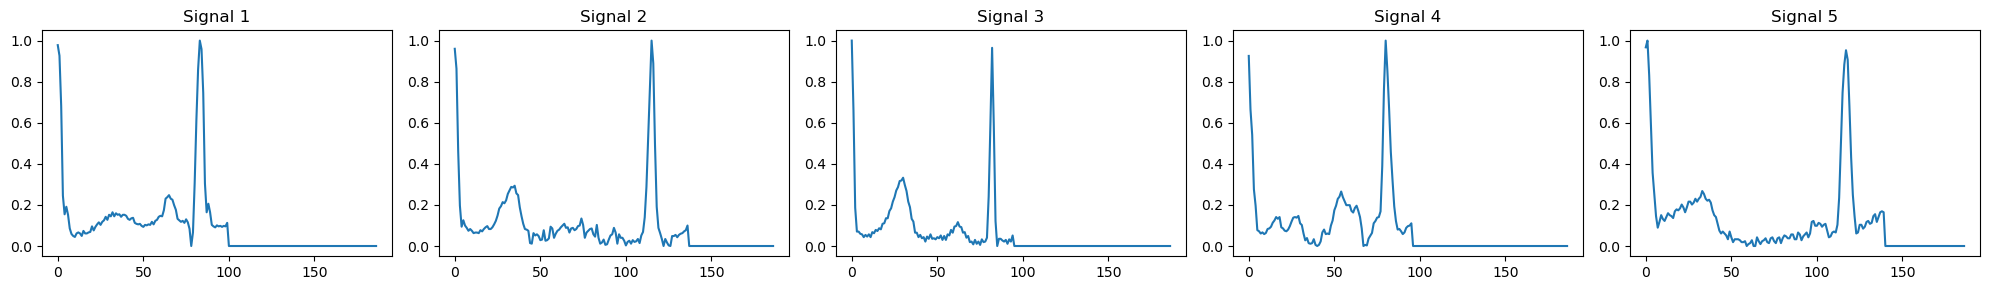

In [14]:
#Display 5 signals from the dataset
num_signals = 5
fig, axs = plt.subplots(1, num_signals, figsize=(20, 3))

for i in range(num_signals):
    axs[i].plot(dataset.columns[:-1], dataset.iloc[i, :-1])
    axs[i].set_title(f'Signal {i+1}')

plt.tight_layout()
plt.show()


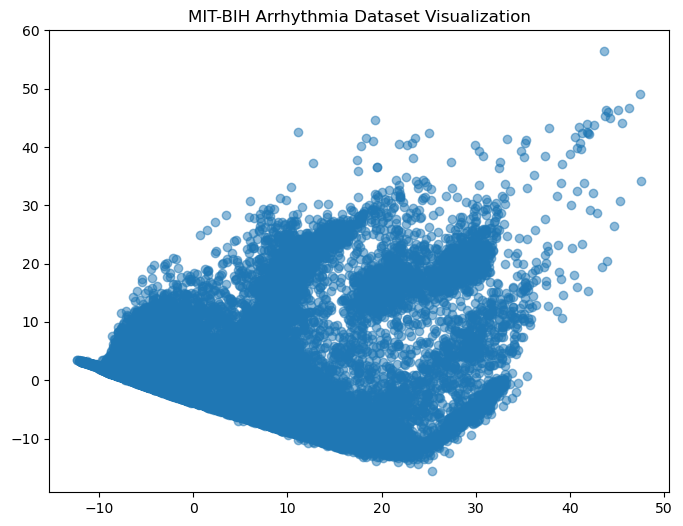

In [15]:
# Visualize the data using a scatter plot

scaler = StandardScaler()
df_scaled = scaler.fit_transform(dataset)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5)
plt.title('MIT-BIH Arrhythmia Dataset Visualization')
plt.show()

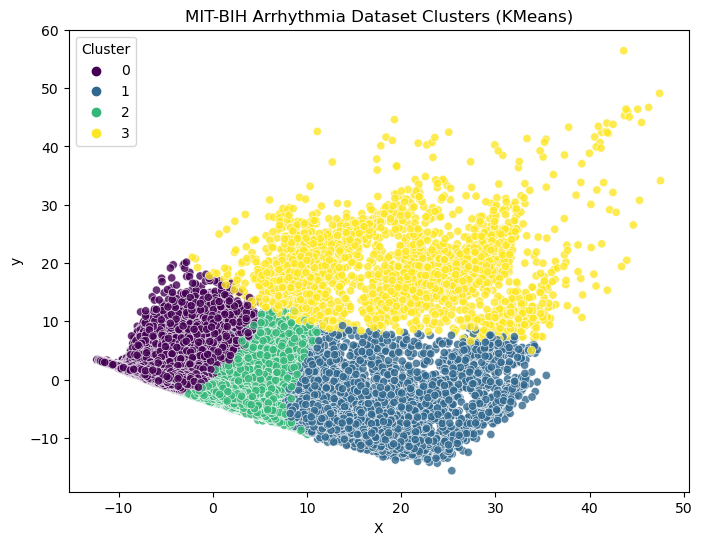

In [16]:
# Apply KMeans clustering for Visualize the clusters


kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

df_pca_clusters = pd.DataFrame(df_pca, columns=['X', 'y'])
df_pca_clusters['Cluster'] = clusters


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca_clusters, x='X', y='y', hue='Cluster', palette='viridis', alpha=0.8)
plt.title('MIT-BIH Arrhythmia Dataset Clusters (KMeans)')
plt.show()

In [17]:
category_mapping = {
    0: 'Normal heartbeat',
    1: 'Supraventricular premature beat',
    2: 'Premature ventricular contraction',
    3: 'Fusion of ventricular and normal beat',
    4: 'Unclassifiable beat'
}

# Replace the values in the 'Category' column
dataset['Category'] = dataset.iloc[:, -1].replace(category_mapping)

Category
Normal heartbeat                         72471
Unclassifiable beat                       6431
Premature ventricular contraction         5788
Supraventricular premature beat           2223
Fusion of ventricular and normal beat      641
Name: count, dtype: int64


<Axes: xlabel='Category'>

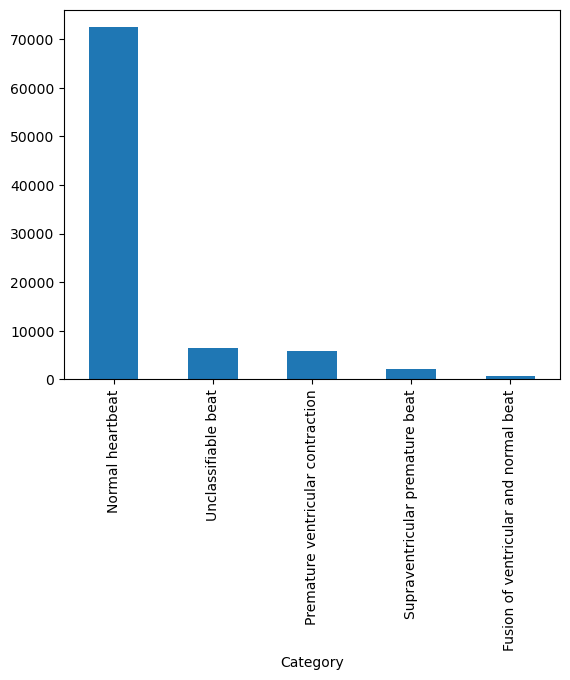

In [18]:
#Unbalanced Dataset
CountStatus = pd.value_counts(dataset['Category'], sort=True)
print(CountStatus)

CountStatus.plot.bar()

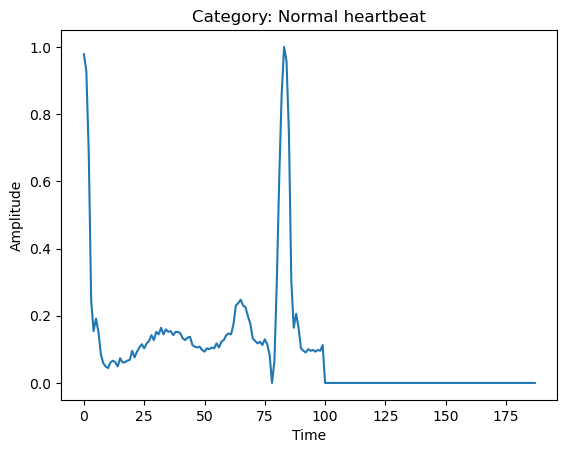

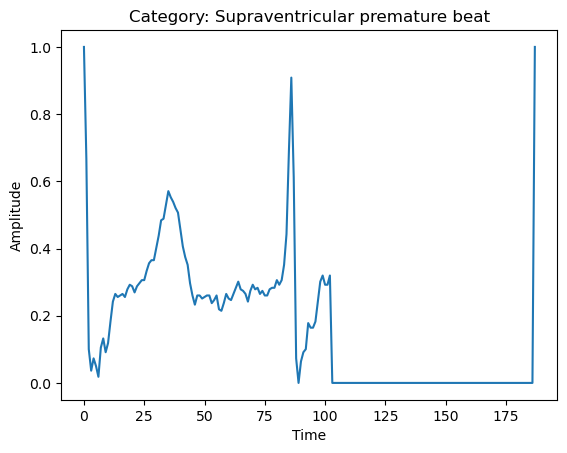

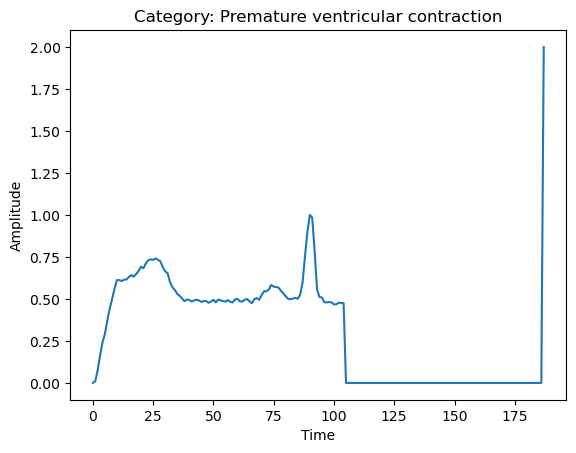

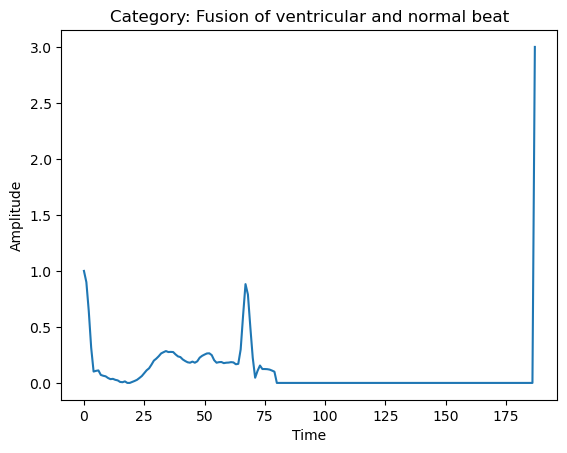

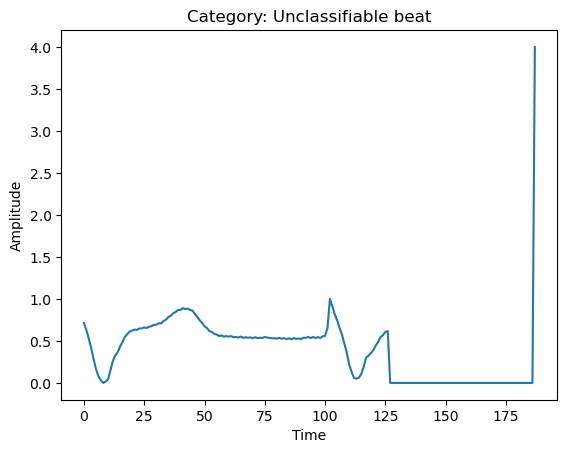

In [19]:
%matplotlib inline

categories = dataset.iloc[:, -1]

# Iterate through unique categories and display one sample plot for each
for category in categories.unique():
    # Extract one sample for each category
    sample = dataset[dataset.iloc[:, -1] == category].iloc[0, :-1]  # Exclude the last column as it contains the category label

    # Plot the ECG signal
    plt.figure()
    plt.plot(sample)
    plt.title(f'Category: {category}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    # Display the plot in the notebook
    plt.show()


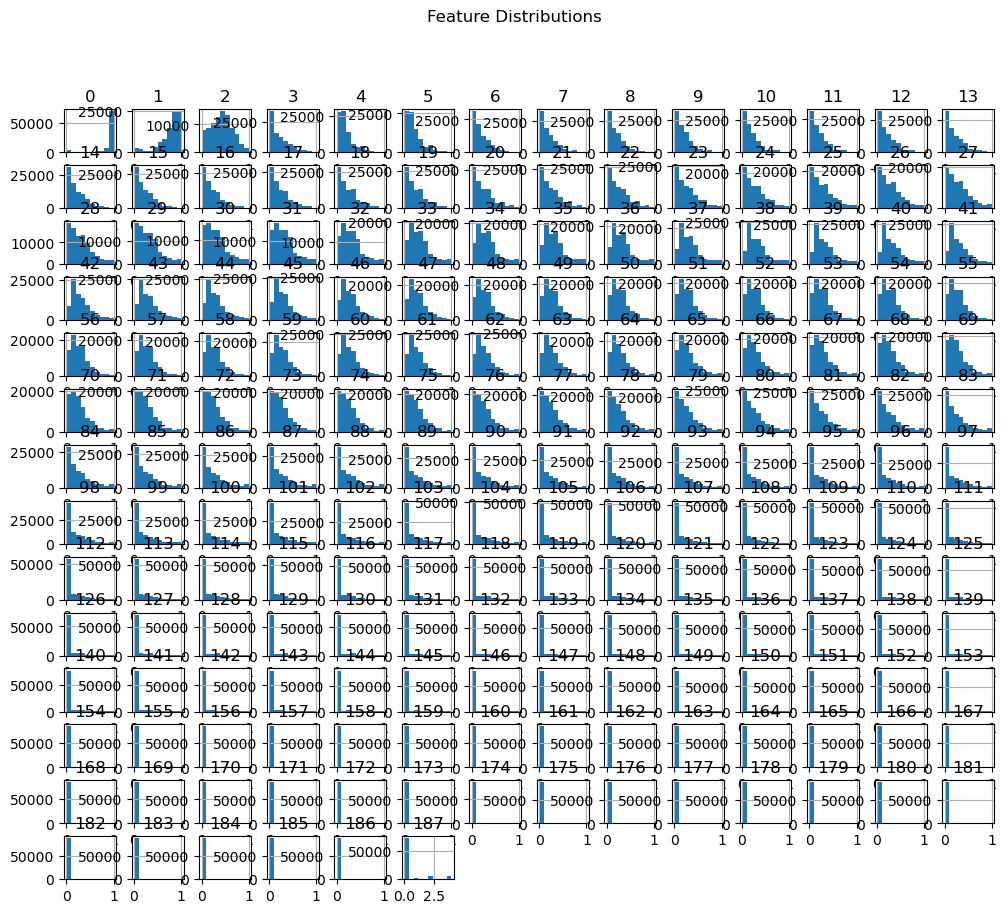

In [35]:
dataset.hist(figsize=(12, 10))
plt.suptitle('Feature Distributions')
plt.show(10)

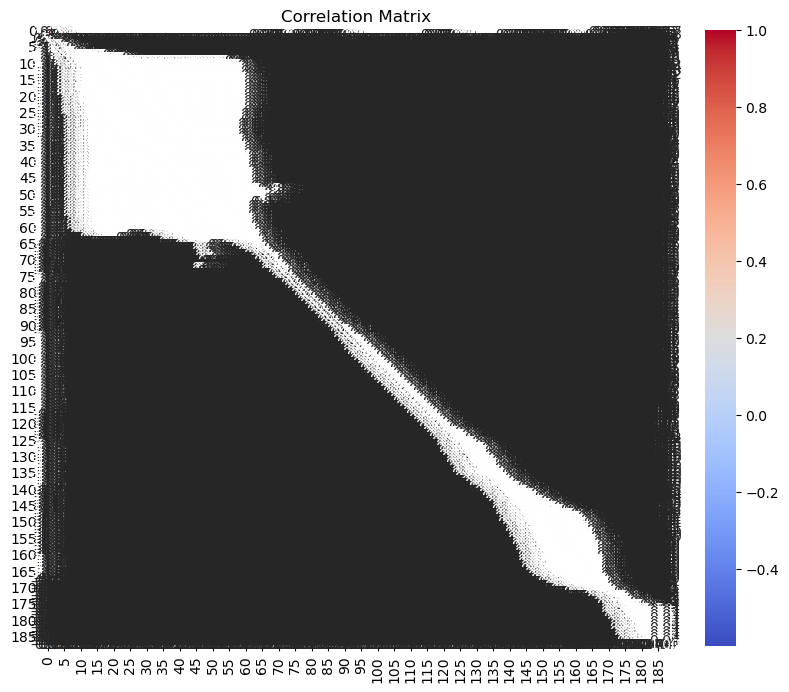

In [34]:
# Calculate and visualize the correlation matrix
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Normal Classification for Random Forest, KNN, Naive Bayes

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings("ignore")

# Load the dataset 
df = pd.read_csv("mitbih_train.csv", header=None)

# Assuming the last column contains the target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the class distribution before under-sampling
print("Class distribution before under-sampling:\n", y_train.value_counts())

# Apply random under-sampling to balance the data
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Check the class distribution after under-sampling
print("Class distribution after under-sampling:\n", pd.Series(y_resampled).value_counts())

# Train and evaluate Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_resampled, y_resampled)
rf_y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of Random Forest classifier
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_classification_rep = classification_report(y_test, rf_y_pred)
print('\nRandom Forest Classifier:')
print(f'Accuracy: {rf_accuracy:.2f}')
print('Classification Report:\n', rf_classification_rep)


# Train and evaluate K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_resampled, y_resampled)
knn_y_pred = knn_classifier.predict(X_test)

# Evaluate the performance of K-Nearest Neighbors classifier
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_classification_rep = classification_report(y_test, knn_y_pred)
print('\nK-Nearest Neighbors Classifier:')
print(f'Accuracy: {knn_accuracy:.2f}')
print('Classification Report:\n', knn_classification_rep)

# Train and evaluate Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_resampled, y_resampled)
nb_y_pred = nb_classifier.predict(X_test)

# Evaluate the performance of Naive Bayes classifier
nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_classification_rep = classification_report(y_test, nb_y_pred)
print('\nNaive Bayes Classifier:')
print(f'Accuracy: {nb_accuracy:.2f}')
print('Classification Report:\n', nb_classification_rep)


Class distribution before under-sampling:
 187
0.0    57892
4.0     5182
2.0     4676
1.0     1797
3.0      496
Name: count, dtype: int64
Class distribution after under-sampling:
 187
0.0    496
1.0    496
2.0    496
3.0    496
4.0    496
Name: count, dtype: int64

Random Forest Classifier:
Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.83      0.90     14579
         1.0       0.30      0.82      0.44       426
         2.0       0.59      0.87      0.70      1112
         3.0       0.12      0.91      0.22       145
         4.0       0.84      0.96      0.90      1249

    accuracy                           0.84     17511
   macro avg       0.57      0.88      0.63     17511
weighted avg       0.93      0.84      0.87     17511


K-Nearest Neighbors Classifier:
Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.71      0.83     14579

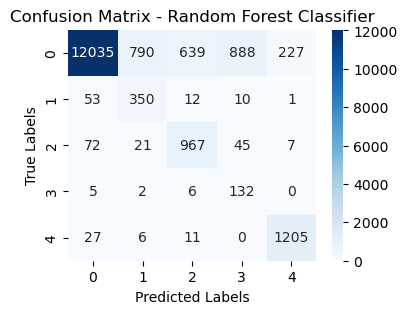

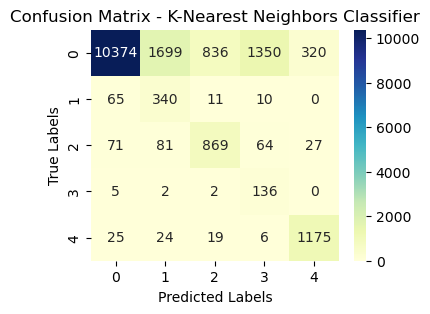

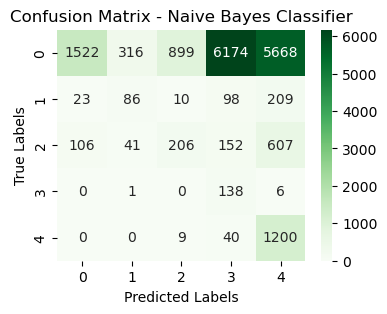

In [21]:
#Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate confusion matrix for SVM Classifier
rf_cm = confusion_matrix(y_test, rf_y_pred)

# Plot confusion matrix for SVM Classifier
plt.figure(figsize=(4, 3))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Calculate confusion matrix for KNN Classifier
knn_cm = confusion_matrix(y_test, knn_y_pred)

# Plot confusion matrix for KNN Classifier
plt.figure(figsize=(4, 3))
sns.heatmap(knn_cm, annot=True, fmt='d',  cmap='YlGnBu')
plt.title('Confusion Matrix - K-Nearest Neighbors Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

nb_cm = confusion_matrix(y_test, nb_y_pred)

# Plot confusion matrix for Naive Bayes Classifier
plt.figure(figsize=(4, 3))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


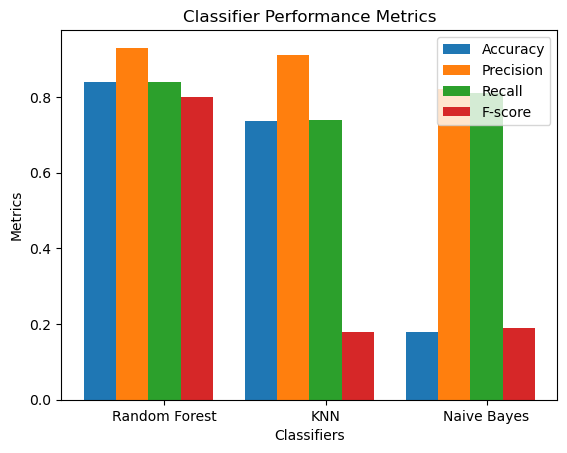

In [22]:
classifiers = ['Random Forest', 'KNN', 'Naive Bayes']
accuracy = [rf_accuracy,knn_accuracy, nb_accuracy]
precision = [0.93, 0.91, 0.82]
recall = [0.84, 0.74, 0.81]
f_score = [0.80, 0.18, 0.19]

# Set up the figure and axes
fig, ax = plt.subplots()

# Set the bar width
bar_width = 0.2
index = np.arange(len(classifiers))

# Plot the bars for each metric
bar1 = ax.bar(index - bar_width, accuracy, bar_width, label='Accuracy')
bar2 = ax.bar(index, precision, bar_width, label='Precision')
bar3 = ax.bar(index + bar_width, recall, bar_width, label='Recall')
bar4 = ax.bar(index + 2 * bar_width, f_score, bar_width, label='F-score')

# Add labels, title, and legend
ax.set_xlabel('Classifiers')
ax.set_ylabel('Metrics')
ax.set_title('Classifier Performance Metrics')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(classifiers)
ax.legend()

# Show the plot
plt.show()

# GWO based Improved classification

In [23]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
import benchmarks

def GWO(objf,lb,ub,dim,SearchAgents_no,Max_iter):
    
    # initialize alpha, beta, and delta_pos
    Alpha_pos=np.zeros(dim)
    Alpha_score=float("inf")
    
    Beta_pos=np.zeros(dim)
    Beta_score=float("inf")
    
    Delta_pos=np.zeros(dim)
    Delta_score=float("inf")

    if not isinstance(lb, list):
        lb = [lb] * dim
    if not isinstance(ub, list):
        ub = [ub] * dim
    
    #Initialize the positions of search agents
    Positions = np.zeros((SearchAgents_no, dim))
    for i in range(dim):
        Positions[:, i] = np.random.uniform(0,1, SearchAgents_no) * (ub[i] - lb[i]) + lb[i]
    
    Convergence_curve=np.zeros(Max_iter)

     # Loop counter
    #print("GWO is optimizing  \""+objf.__name__+"\"")    

    # Main loop
    for l in range(0,Max_iter):
        for i in range(0,SearchAgents_no):
            
            # Return back the search agents that go beyond the boundaries of the search space
            for j in range(dim):
                Positions[i,j]=np.clip(Positions[i,j], lb[j], ub[j])

            # Calculate objective function for each search agent
            fitness=objf(Positions[i,:])
            
            # Update Alpha, Beta, and Delta
            if fitness<Alpha_score :
                Alpha_score=fitness; # Update alpha
                Alpha_pos=Positions[i,:].copy()
            
            
            if (fitness>Alpha_score and fitness<Beta_score ):
                Beta_score=fitness  # Update beta
                Beta_pos=Positions[i,:].copy()
            
            
            if (fitness>Alpha_score and fitness>Beta_score and fitness<Delta_score): 
                Delta_score=fitness # Update delta
                Delta_pos=Positions[i,:].copy()
        
        a=2-l*((2)/Max_iter); # a decreases linearly fron 2 to 0
        
        # Update the Position of search agents including omegas
        for i in range(0,SearchAgents_no):
            for j in range (0,dim):     
                           
                r1=random.random() # r1 is a random number in [0,1]
                r2=random.random() # r2 is a random number in [0,1]
                
                A1=2*a*r1-a; 
                C1=2*r2; 
                
                D_alpha=abs(C1*Alpha_pos[j]-Positions[i,j]); 
                X1=Alpha_pos[j]-A1*D_alpha; 
                           
                r1=random.random()
                r2=random.random()
                
                A2=2*a*r1-a; 
                C2=2*r2; 
                
                D_beta=abs(C2*Beta_pos[j]-Positions[i,j]); 
                X2=Beta_pos[j]-A2*D_beta;        
                
                r1=random.random()
                r2=random.random() 
                
                A3=2*a*r1-a; 
                C3=2*r2; 
                
                D_delta=abs(C3*Delta_pos[j]-Positions[i,j]); 
                X3=Delta_pos[j]-A3*D_delta;           
                
                Positions[i,j]=(X1+X2+X3)/3      
        Convergence_curve[l]=Alpha_score;

        #if (l%1==0):
               #print(['At iteration '+ str(l)+ ' the best fitness is '+ str(Alpha_score)]);
    
    #print(Positions.shape)
    #print("Alpha position=",Alpha_pos);
    #print("Beta position=",Beta_pos);
    #print("Delta position=",Delta_pos);
    return Alpha_pos,Beta_pos;

#load the dataset
dataset = pd.read_csv("mitbih_train.csv")  

iters = 1000
wolves = 5
dimension = 13
search_domain = [0, 1]
lb = -1.28
ub = 1.28
colneeded = [0, 1, 2, 4, 5, 7, 8, 10, 11]

# Create a DataFrame for modified data
modified_data = pd.DataFrame()

for i in colneeded:
    modified_data[dataset.columns[i]] = dataset[dataset.columns[i]].astype(float)

# Perform under-sampling to address class imbalance
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(modified_data, dataset.iloc[:, -1])

# Check the class distribution before under-sampling
print("Class distribution before under-sampling:\n", y_train.value_counts())

# Check the class distribution after under-sampling
print("Class distribution after under-sampling:\n", pd.Series(y_resampled).value_counts())



# GWO optimization
for i in range(0, 10):
    alpha, beta = GWO(getattr(benchmarks, 'F7'), lb, ub, dimension, wolves, iters)

# Feature selection based on alpha and a threshold
threshold = -0.05
selected_features = [feature for feature, alpha_value in zip(modified_data.columns, alpha) if alpha_value >= threshold]
modified_data = modified_data[selected_features]

# Train-test split
Y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(modified_data, Y, test_size=0.2, random_state=42)

# Standardize data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)

# Create and train a K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
knn_y_pred = knn_classifier.predict(X_test)

# Create and train a Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_y_pred = nb_classifier.predict(X_test)

# Evaluate models
rf_accuracy = accuracy_score(y_test, rf_y_pred)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
nb_accuracy = accuracy_score(y_test, nb_y_pred)

print("/n Optimum Features Selected by GWO:")
print(selected_features)
print("\n")

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred))

print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("K-Nearest Neighbors Classification Report:\n", classification_report(y_test, knn_y_pred))

print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_y_pred))



Class distribution before under-sampling:
 187
0.0    57892
4.0     5182
2.0     4676
1.0     1797
3.0      496
Name: count, dtype: int64
Class distribution after under-sampling:
 0.000000000000000000e+00.88
0.0    641
1.0    641
2.0    641
3.0    641
4.0    641
Name: count, dtype: int64
/n Optimum Features Selected by GWO:
['9.264705777168273926e-01', '1.544117629528045654e-01', '1.911764740943908691e-01', '8.578431606292724609e-02', '5.882352963089942932e-02', '4.411764815449714661e-02', '6.127450987696647644e-02']


Random Forest Accuracy: 0.950888013248815
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     14577
         1.0       0.85      0.36      0.50       418
         2.0       0.92      0.76      0.83      1120
         3.0       0.76      0.19      0.31       152
         4.0       0.97      0.93      0.95      1244

    accuracy                           0.95     17511
   macro avg   

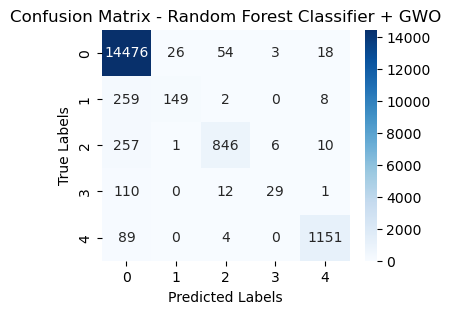

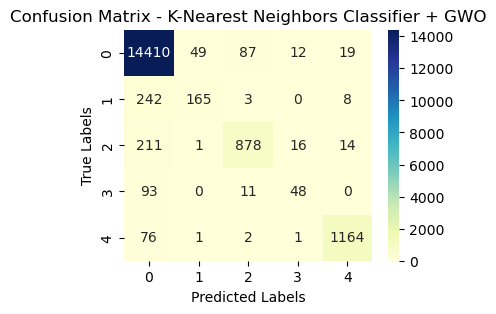

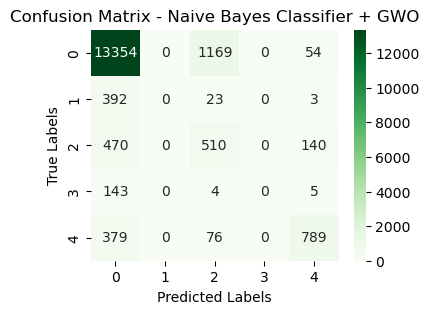

In [24]:
#Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate confusion matrix for SVM Classifier
rf_cm = confusion_matrix(y_test, rf_y_pred)

# Plot confusion matrix for SVM Classifier
plt.figure(figsize=(4, 3))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest Classifier + GWO')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Calculate confusion matrix for KNN Classifier
knn_cm = confusion_matrix(y_test, knn_y_pred)

# Plot confusion matrix for KNN Classifier
plt.figure(figsize=(4, 3))
sns.heatmap(knn_cm, annot=True, fmt='d',  cmap='YlGnBu')
plt.title('Confusion Matrix - K-Nearest Neighbors Classifier + GWO')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

nb_cm = confusion_matrix(y_test, nb_y_pred)

# Plot confusion matrix for Naive Bayes Classifier
plt.figure(figsize=(4, 3))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Naive Bayes Classifier + GWO')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


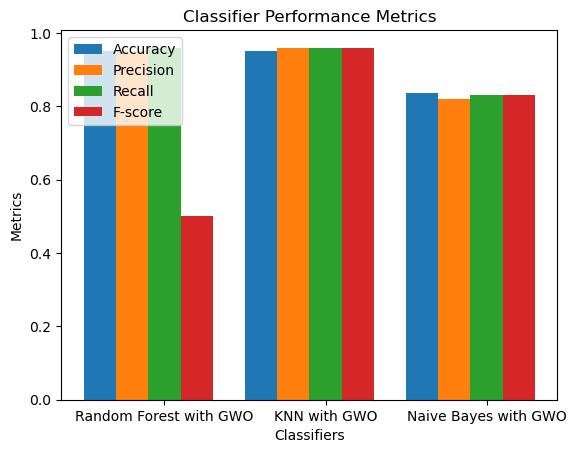

In [25]:
classifiers = ['Random Forest with GWO', 'KNN with GWO', 'Naive Bayes with GWO']
accuracy = [rf_accuracy,knn_accuracy, nb_accuracy]
precision = [0.95, 0.96, 0.82]
recall = [0.96, 0.96, 0.83]
f_score = [0.5, 0.96, 0.83]
  
# Set up the figure and axes
fig, ax = plt.subplots()

# Set the bar width
bar_width = 0.2
index = np.arange(len(classifiers))

# Plot the bars for each metric
bar1 = ax.bar(index - bar_width, accuracy, bar_width, label='Accuracy')
bar2 = ax.bar(index, precision, bar_width, label='Precision')
bar3 = ax.bar(index + bar_width, recall, bar_width, label='Recall')
bar4 = ax.bar(index + 2 * bar_width, f_score, bar_width, label='F-score')

# Add labels, title, and legend
ax.set_xlabel('Classifiers')
ax.set_ylabel('Metrics')
ax.set_title('Classifier Performance Metrics')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(classifiers)
ax.legend()

# Show the plot
plt.show()

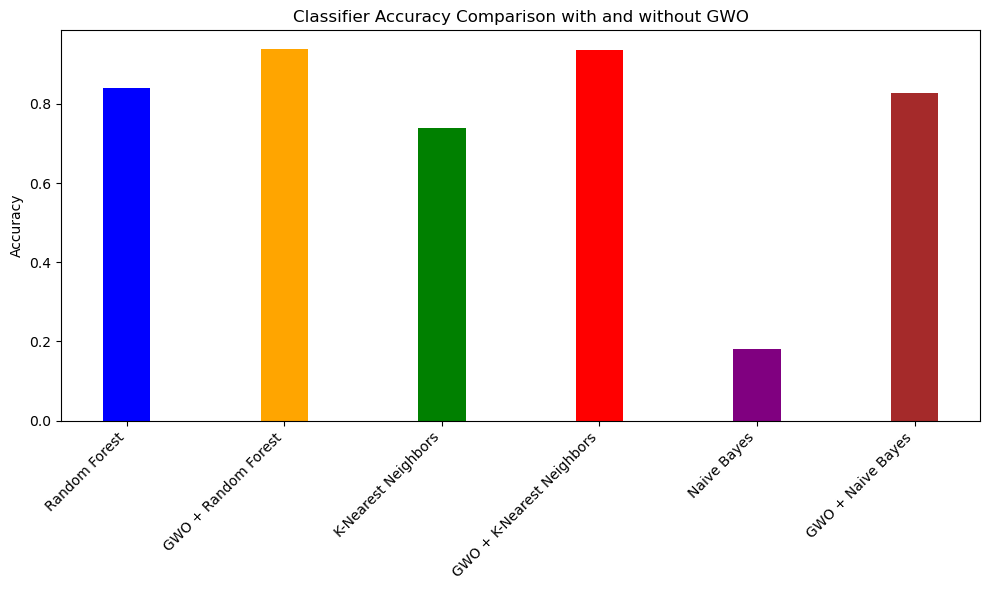

In [26]:
import matplotlib.pyplot as plt

# Accuracy data
classifiers = ['Random Forest',  'GWO + Random Forest','K-Nearest Neighbors','GWO + K-Nearest Neighbors', 'Naive Bayes', 'GWO + Naive Bayes']
accuracies = [0.84, 0.938438695677003, 0.74, 0.9362686311461367,0.18,  0.8278796185254983]  
# Bar width
bar_width = 0.3

# Set up figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar graph
bar_positions = range(len(classifiers))
ax.bar(bar_positions, accuracies, bar_width, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])

# Set labels and title
ax.set_xticks(bar_positions)
ax.set_xticklabels(classifiers, rotation=45, ha="right")
ax.set_ylabel('Accuracy')
ax.set_title('Classifier Accuracy Comparison with and without GWO')

# Show the plot
plt.tight_layout()
plt.show()


187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64


<Axes: xlabel='187'>

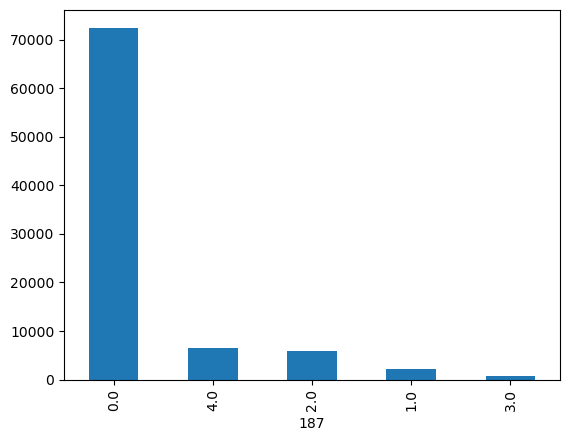

In [31]:
#Unbalanced Dataset
CountStatus = pd.value_counts(dataset[187], sort=True)
print(CountStatus)

CountStatus.plot.bar()

0.000000000000000000e+00.88
0.0    641
1.0    641
2.0    641
3.0    641
4.0    641
Name: count, dtype: int64


<Axes: xlabel='0.000000000000000000e+00.88'>

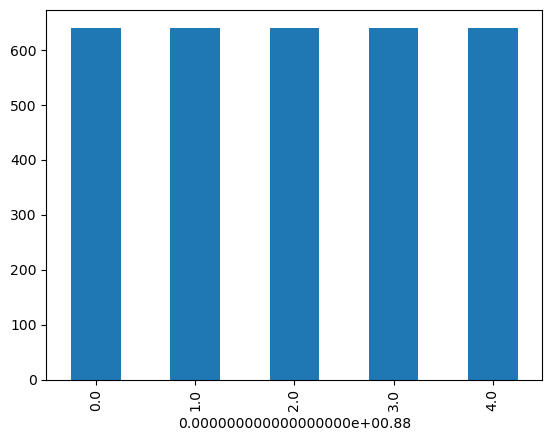

In [30]:
#Balanced Data set
CountStatus = pd.value_counts(y_resampled, sort=True)
print(CountStatus)

CountStatus.plot.bar()

In [32]:
print("Optimum Features Selected by GWO:")
print("\n")
print(selected_features)


Optimum Features Selected by GWO:


['9.264705777168273926e-01', '1.544117629528045654e-01', '1.911764740943908691e-01', '8.578431606292724609e-02', '5.882352963089942932e-02', '4.411764815449714661e-02', '6.127450987696647644e-02']
